<a href="https://colab.research.google.com/github/evansemet/Jane-Street-Solutions/blob/main/2014_02_Hooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The output grid is correct, but for some reason, I am unable to print the sum of the grey regions that the puzzle asks for when uploading your solution since Jane Street does not take pictures for a solution. I will need to come back to that and address it.

In [43]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

In [44]:
# information provided
rowsGiven = np.array([26, 42, 11, 22, 42, 36, 29, 32, 45], dtype=int)
colsGiven = np.array([31, 19, 45, 16, 5, 47, 28, 49, 45], dtype=int)

In [49]:
def solve():
  print("Solving...")
  start = time.time()
  X = np.array(IntVector("x", 9**2), dtype=object).reshape((9, 9))
  s = Solver()

  # makes sure each number is from 0 to 9 and the sums match the given values
  s += [And(val >= 0, val <= 9) for val in X.ravel()]
  s += [np.sum(X[r, :]) == int(val) for r, val in np.ndenumerate(rowsGiven)]
  s += [np.sum(X[:, c]) == int(val) for c, val in np.ndenumerate(colsGiven)]

  # we were given the placement of the 1 (not that it could've gone anywhere else though)
  s += [X[0][0] == 1]

  # only n instances of n (the 1 is already accounted for)
  for n in range(2, 10):
    s += PbEq([(X[i][j] == n, 1) for j in range(9) for i in range(9)], n)

  # provides what values can be in each hook
  s += [Or(X[r][c] == max(r + 1, c + 1), X[r][c] == 0) for r in range(9) for c in range(9)]

  if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x: m.evaluate(x).as_long())
    r = evalu(X)
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax = sns.heatmap(np.zeros_like(r), annot=r, cbar=False, cmap="Greys", linecolor='k', linewidth=2, annot_kws={"fontsize":14})
    ax.axis("off")
    print(f"Solved in {time.time() - start} seconds.")
  else:
    print(f"Failed in {time.time() - start} seconds.")

Solving...
Solved in 0.3492546081542969 seconds.


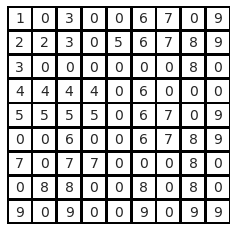

In [48]:
# runs the code
solve()